# <span style="color: #5A9BDC;">Case Study: Bellabeat Fitness Data Analysis</span>
This case study is the Capstone Project of Google Data Analytics Professional Certificate on Coursera.
> **Author** Jenn Kang  
> **Date:** December 2025

## <span style="color: #5A9BDC;">1. Background</span>
Bellabeat is a high-tech manufacturer of health-focused products focused on producing beautiful technology for women. These products are made to appear like fashion accessories and are used to monitor various health data. The CCO, Urška Sršen, has given the task of analysing smart device data to gain insight into how consumers are using their smart devices, then help guide marketing strategy for the company focusing on one product.

## <span style="color: #5A9BDC;">2. Ask Phase</span>
### <span style="color: #5A9BDC;">2.1. Business Task</span>

Analyse smart device data to understand customer usage trends to recommend new marketing strategies for one of Bellabeat’s products.

### <span style="color: #5A9BDC;">2.2. Stakeholders</span>

* Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer (CCO)
* Sando Mur: Mathematician and Bellabeat’s cofounder who is a key member of the Bellabeat executive team
* Bellabeat’s marketing analytics team.

## <span style="color: #5A9BDC;">3. Prepare Phase</span>
### <span style="color: #5A9BDC;">3.1. Dataset Information</span>

The data used was made available through Mobius and obtained from Kaggle. The data was collected from 30 Fitbit users which include information about physical activity, heartrate, and sleep monitoring from 12th March 2016 to 12th May 2016.

### <span style="color: #5A9BDC;">3.2. Accessibility and Usage of Data</span>

The data is classified CC0: Public Domain. This means it is a “no rights reserved” tools what enables users to freely use and share the data without attribution.

### <span style="color: #5A9BDC;">3.3. Dataset Organisation</span>

The dataset is stored in CSV files and divided into two folders. The first folder (Folder 1) contains 11 CSV files with the timeline from 12th March 2016 to 11th April 2016, and the second folder (Folder 2) contains 18 CSV files ranging from 12th April 2016 to 12th May 2016.

### <span style="color: #5A9BDC;">3.4. Dataset Quality and Integrity</span>

I will use ROCCC for dataset quality and integrity analysis:
* R (Reliable): not very reliable.
    * The sample size is small with only 30-33 unique users’ data that can be used. 
    * Additionally, there may be sampling bias as those who consented to having their data used may be active and healthy which may not accurately represent the population. 
* O (Original): not very original.
    * The data was not collected directly by Fitbit or Bellabeat. This is third-party data collected in a survey via Amazon Mechanical Turk and made available for use by Mobius on Kaggle.
* C (Comprehensive): somewhat comprehensive.
    * The dataset contains relevant information to identify trends in the data to analyse how users use their smart device. However, there is a lack of demographic data. This is particularly important in this case as Bellabeat focuses on helping to track women’s health and through menstrual cycles and pregnancy. 
    * Furthermore, the longest collection of data is 2 months long (12th March 2016 to 12th May 2016) which may not accurately represent the population.
    * From initial investigations, it was found that some files do not contain at least 30 unique users, so these will not be used for analysing trends in the data.
* C (Current): not current.
    * The data was collected in 2016 and as the year currently is 2025, it may no longer be relevant to current smart device usage trends today.
* C (Cited): properly cited.
    * The data can be tracked back to a credible [source](https://zenodo.org/record/53894#.X9oeh3Uzaao).

## <span style="color: #5A9BDC;">4. Process Phase</span>
### <span style="color: #5A9BDC;">4.1. Data Used</span>

For my analysis, I will use the datasets listed below as these can be found in both Folder 1 & 2, which covers the full 2 months of data collected. As the dataset documentation states that 30 Fitbit users submitted their personal tracker data between 12th March 2012 to 12th May 2016, thus I will assume that the data from the 30 users can be found in both Folder 1 & 2.  
[This pdf](https://www.fitabase.com/media/1748/fitabasedatadictionary.pdf) outlines and describes what data in each column represents.
It is noted that the files I will use are in long/narrow format, where each date or timestamp is recorded in separate rows and each user has a unique ID number.

Datasets analysed for this case study are as follows:
* dailyActivity_merged (renamed to daily_activity_merged)
* hourlyCalories_merged (renamed to calories_hour_merged)
* hourlyIntensities_merged (renamed to intensities_hour_merged)
* hourlySteps_merged (renamed to steps_hour_merged)

### <span style="color: #5A9BDC;">4.2. Data Tools Used</span>

I will use PostgreSQL (pgAdmin 4) for data cleaning, manipulation, and simple analysis, and Tableau to create visualisations.

### <span style="color: #5A9BDC;">4.3. Importing Datasets, Data Cleaning and Manipulation</span>

Here are the steps taken to clean and manipulate the datasets.

1.	The CSV files were imported into PostgreSQL with the table names and column headers condensed and changed to snake_case for ease of reading.
2.	Changed the date column titles to “activity_date” for consistency.
3.	Separated tables with table name ending in “_1” or “_2” depending on which folder the data came from (Folder 1 or Folder 2, respectively).

    I used the following query to create an empty table to import the dataset into. This query was used to create an empty table to contain data from the file dailyActivity_merged from Folder1. Other tables were created in a similar way.

```sql
CREATE TABLE daily_activity_1 (
	id BIGINT
	, activity_date TEXT
	, tot_steps BIGINT
	, tot_dist NUMERIC
	, tracker_dist NUMERIC
	, log_activities_dist NUMERIC
	, very_active_dist NUMERIC
	, mod_active_dist NUMERIC
	, light_active_dist NUMERIC
	, sed_active_dist NUMERIC
	, very_active_min BIGINT
	, fair_active_min BIGINT
	, light_active_min BIGINT
	, sed_min BIGINT
	, calories BIGINT
);
```
**Note** that the date column (activity_date) was first set as a TEXT datatype as pgAdmin4 could not recognise the format 'M-DD-YYYY' as a DATE or TIMESTAMP datatype. This was parsed to the correct date or timestamp datatype in the next step.

4. Parsed the date data on all tables to match the raw data format. DATE for daily_activity_merged, and TIMESTAMP for the other tables.
I used the following query to parse the data for daily_activity_1. Other tables were parsed in a similar way.

```sql
ALTER TABLE daily_activity_1
ALTER COLUMN activity_date TYPE TIMESTAMP
USING TO_TIMESTAMP(activity_date, 'MM/DD/YYYY HH12:MI:SS AM');
```

5.	Combined tables containing the same data parameters from Folder 1 & 2 using UNION. Using UNION also removes duplicates between the two tables.
I used the following query to combine the data for daily_activity 1 and 2. Other tables were combined in a similar way.

```sql
CREATE TABLE daily_activity_merged AS (
	SELECT *
	FROM daily_activity_1
	UNION
	SELECT *
	FROM daily_activity_2
);
```

6.	Checked for duplicate records for all tables.
    I used the following query to identify the number of duplicate records. Other tables were queried in a similar way.
    
```sql
SELECT 
	id
	, activity_date
	, COUNT(*) AS occurrences
FROM daily_activity_merged
GROUP BY id, activity_date
HAVING COUNT(*) > 1;
```

  * **Result:**
      * daily_activity_merged: 24
      * daily_activity_merged: 0
      * calories_hour_merged: 0
      * intensities_hour_merged: 0
      * steps_hour_merged: 0

7.	Removed the duplicated records from daily_activity_merged.

```sql
DELETE FROM daily_activity_merged
WHERE ctid IN (
    SELECT ctid
    FROM (
        SELECT ctid,
               ROW_NUMBER() OVER (PARTITION BY id, activity_date ORDER BY id) AS rn
        FROM daily_activity_merged
    ) duplicates
    WHERE rn > 1
);
```

8.	Checked for irregular data that would not make sense. There are 1440 minutes in a day. Thus, the total active minutes a user has in a day should not exceed this amount.

```sql
SELECT COUNT(*)
FROM daily_activity_merged
WHERE 
	very_active_min + fair_active_min + light_active_min > 1440;
```
   * **Result:**
       * Returned 0 – no records where a user is active for more than 1440 minutes in a day.

9.	Checked for irregular data that would not make sense. Humans burn calories even when stationary. Thus, there should be no records of users burning 0 calories in a day.

```sql
SELECT COUNT(*)
FROM daily_activity_merged
WHERE 
	calories <= 0;
```

* **Result:**
    * Returned 7 records.
    * All 7 records had no active data (steps, distance, or active minutes) but had data for sedentary minutes of 1440 minutes, which is a full day. This may be the result of incorrect wearing of the device. Therefore, these records were removed.

```sql
DELETE FROM daily_activity_merged
WHERE calories <= 0;
```

10.	Removal of records where all health parameters were 0 (all columns of data excluding id and activity_date) for all 4 tables.
SQL query for finding records where all health parameters were 0 for all tables was as follows:

```sql
SELECT
	(SELECT COUNT(*)
	FROM daily_activity_merged
	WHERE
		tot_steps = 0
		AND tot_dist = 0
		AND tracker_dist = 0
		AND log_activities_dist = 0
		AND very_active_dist = 0
		AND mod_active_dist = 0
		AND light_active_dist = 0
		AND sed_active_dist = 0
		AND very_active_min = 0
		AND fair_active_min = 0
		AND light_active_min = 0
		AND sed_min = 0
		AND calories = 0
	) AS no_zero_activity
	, (SELECT COUNT(*)
	FROM calories_hour_merged
	WHERE	calories = 0
	) AS no_zero_calories
	, (SELECT COUNT(*)
	FROM hourly_steps_merged
	WHERE tot_steps = 0
	) AS no_zero_steps
	, (SELECT COUNT(*)
	FROM intensities_hour_merged
	WHERE
		tot_intensity = 0
		AND avg_intensity = 0
	) AS no_zero_intensity
;
```

* **Result:**
| no_zero_activity | no_zero_calories | no_zero_steps | no_zero_intensity |
|:---|:---|:---|:---|
| 0 | 0 | 20478 | 20027 |

The following queries were used to remove records that fit the criteria:
```sql
DELETE FROM steps_hour_merged
WHERE tot_steps = 0;
```
```sql
DELETE FROM intensities_hour_merged
WHERE
	avg_intensity = 0
	AND avg_intensity = 0;
```

11.	Removed timezone indicator “+11” from timezone data in dataset intensities_min_merged to meet Tableau date time standard.

```sql
ALTER TABLE intensities_min_merged
ALTER COLUMN activity_date TYPE TIMESTAMP WITHOUT TIME ZONE
USING activity_date::TIMESTAMP;
```

12.	Confirmed the number of unique users in each dataset.

```sql
SELECT
    (SELECT COUNT(DISTINCT id) FROM daily_activity_merged) AS no_users_activity
    , (SELECT COUNT(DISTINCT id) FROM calories_hour_merged) AS no_users_calories
    , (SELECT COUNT(DISTINCT id) FROM steps_hour_merged) AS no_users_steps
    , (SELECT COUNT(DISTINCT id) FROM intensities_hour_merged) AS no_users_intensity;
```
* **Result:**
| no_users_activity | no_users_calories | no_users_steps | no_users_intensity |
|:---|:---|:---|:---|
| 35 | 35 | 35 | 35 |

## <span style="color: #5A9BDC;">5. Analysis and Share Phases</span>

I will analyse the FitBit User data to identify trends to provide recommendations for BellaBeat's marketing strategy.

All visualisations were created on and can be found on [Tableau](https://public.tableau.com/views/BellabeatCaseStudy_17651628172570/UserProductUsage?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link).

### <span style="color: #5A9BDC;">5.1. User Engagement - User Categories</span>

**Assumption:** Based on the documentation available for this dataset, it is unclear whether the data is a representation of how often the user wears their FitBit device, or how much of their information they submitted.
For this case study, I will assume that the users submitted all their data for the full 62-day period starting from when they first began participating.

**Objective:**  With this assumption, we can determine how often users wore their device. As there is no demographic information of the users, I will classify the users based on how often they wear their device. This information will be used to understand different user groups when drawing conclusions from the data.

The user categorisations are as follows:
* Daily user: 42-62 total days active out of 62 days.
* Regular user: 21-41 total days active out of 62 days.
* Occasional user: 0-20 total days active out of 62 days.

<div align="left">
    <img src="https://i.imgur.com/Gy5FyP4.png" width="800"/>
    <p><i style="color: #999999;">Figure 1: Pie chart of User Categories.</i></p>
</div>

**Observations:** 
* From the results, we can see that ~94% of users wear their device <u> at least </u> 33%-100% of the time.
* Almost 50% of users wear their device 67%-100% of the time.

**Conclusion:** 
* This could mean that owners of health tracking devices tend to use the product regularly.
* Improvements can be made to incentivise users to wear the device more often.
* However, it is important to note that the results may be biased as the users who volunteered to participate in the survey may tend to wear their device more regularly compared to those who did not participate.

### <span style="color: #5A9BDC;">5.2. User Engagement - Usage Drop-Off</span>

**Objective:** Identifying product usage drop-off is important in determining how to keep the users engaged with the product for them to continue using it.  
The total count of distinct user entries were calculated per day over the 62 day period.

<div align="left">
    <img src="https://i.imgur.com/F74zUs8.png" width="800"/>
    <p><i style="color: #999999;">Figure 2: Number of distinct user logs over 62 days.</i></p>
</div>

**Observations:** 
* From an initial amount of 2 users active, more users show data from the 3rd week and peaks on the 5th week (2nd April) with all 35 users active.
* From 1st April, where most users are active (34 total), the majority are active for 4 weeks until 30th April with 30 active users.
* It then drops off at the 10th week (30th April) and continues to show less active users until the last day.

**Assumption:**
* The gradual increase at the start could signify that users were beginning to partipate in the survey, instead of submitting all their data in one go.

**Conclusion:**
* Using the assumption above, if we mark 1st April as the first day that at least $\frac{30}{35}$ users are active, we can approximate that the product usage drop-off point is 4 weeks.
* Improvements can be made to keep users engaged for longer than a month.

### <span style="color: #5A9BDC;">5.3. User Activity by User Categories</span>

**Objective:** To investigate the activity for each user category to understand their daily patterns. This information can be used to drive different marketing schemes for the different user groups.  
The percentage of total Activity Minutes was calculated for each Activity Type for each of the User Categories.

<div align="left">
    <img src="https://i.imgur.com/j9Y94B9.png" width="800"/>
    <p><i style="color: #999999;">Figure 3: User Activity over 62 days for each User Category.</i></p>
</div>

**Observations:**
* Occasional users have the highest percentage of Sedentary Minutes at 89.5% while Daily users have the lowest percentage at 81.2%.
* Daily users have the highest percentage of Light Active Minutes at 16.3%.
* Regular and Daily users do not show significant differences in activity.

**Conclusion:**
* Occasional users tend to be less active compared to Daily users. Therefore, there is an opportunity to provide incentives or motivation for Occasional users to be more active.
* Marketing towards Regular and Daily users can be the same due to little difference in their overall activity.

### <span style="color: #5A9BDC;">5.4. User Activity - Daily Usage</span>

**Objective:** A daily step count of 7,000 is recommended as it can provide additional health benefits for some conditions, such as heart disease. Further details can be found [here](https://www.abc.net.au/news/health/2025-07-25/step-count-7000-health-benefit/105571904).  
The average daily step count trend across the days of the week was investigated and see if the recommended 7,000 step count is met each day.

<div align="left">
    <img src="https://i.imgur.com/9iPXq8M.png" width="800"/>
    <p><i style="color: #999999;">Figure 4: Average Steps taken across the different days of the week.</i>
    </p>
</div>

**Observations:**
* On average, the recommended 7,000 daily step count is achieved on all days except Sunday which has an average daily step count of 6,641.
* Saturday has the highest average daily step count of 7,831.

**Conclusion:**
* There is an opportunity to challenge users to use the product more often by providing incentives for users to also be active on Sundays.

### <span style="color: #5A9BDC;">5.5. User Activity - Hourly Usage</span>

**Objective:** To understand user movement throughout the day, the average step count per hour of the day was investigated.

<div align="left">
    <img src="https://i.imgur.com/zI7Mzcv.png" width="800"/>
    <p><i style="color: #999999;">Figure 5: Average Steps taken across the different hours of the day.</i></p>
</div>

**Observations:**
* Peak average Step Counts are observed at hours 08:00, 12:00, and 19:00.
* The average Step Count dips at hours 11:00 and 15:00.

**Conclusion:**  
<u> Peak Hours: </u>
* Hour 08:00 - this peak would most likely be due to users commuting into work.
* Hour 12:00 - this peak would most likely be due to users walking around during their lunch break.
* Hour 19:00 - this peak would most likely be due to users commuting back home. As the average Step Count for this hour is higher than at 08:00, users may also be walking to a restaurant for dinner (taking a detour), or exercising at a gym before heading home.

<u> Trough Hours: </u>
* Hour 11:00 - this dip would most likely be due to users getting work done at their desk before their lunch break or due to low energy levels prior to eating lunch.
* Hour 15:00 this dip would again most likely be due to users busy with work and low energy levels after a meal.
* As such, there is an opportunity to remind or incentivise users to get some movement during these hours.

### <span style="color: #5A9BDC;">5.6. Relationship between Steps and Calories</span>

**Objective:** Investigate if there is a relationship between average total daily Calories burned and average total daily Steps taken, then compare different User Categories.

<div align="left">
    <img src="https://i.imgur.com/8a7sebM.png" width="800"/>
    <p><i style="color: #999999;">Figure 6: Relationship between Calories burned vs Steps taken per User Category.</i></p>
</div>

**Observations:**
* There is a positive relationship between Steps taken and Calories burned (i.e. more steps taken in a day would often result in higher calories burned).
* Daily Users have a stronger Steps vs Calories relationship compared to Regular Users (trendling gradient of 0.079 vs 0.050, respectively).
* Occasional Users was removed due to insufficient data and being unable to draw conclusions from it.

**Conclusion:**
* This positive relationship between Steps taken and Calories burned can be used to motivate users to be more active if their goal is to lose weight.
* As Daily Users tend to burn more Calories per Steps taken compared to Regular Users, this can be used to motivate users to be more active and use their device more regularly.

### <span style="color: #5A9BDC;">5.7. Relationship between Activity and Calories</span>

**Objective:** Investigate if there is a relationship between average total daily Calories burned and average daily Activity Mintues of the different Activity Types (Very, Fair, and Light Active Minutes).

<div align="left">
    <img src="https://i.imgur.com/SKoTN3L.png" width="800"/>
    <p><i style="color: #999999;">Figure 7: Relationship between Calories burned vs Activity Type and Minutes per User Category.</i></p>
</div>

**Observations:**
* Very Active Minutes has the strongest relationship with Calories burned with a trendline gradient of 14.67.
* Fair Active Minutes has the second strongest relationship with Calories burned with a trendline gradient of 4.98.
* Light Active Minutes appears to have no significant relationship with Calories burned.

**Conclusion:**
* For users with a goal to lose weight, there is an opportunity to provide motivation or incentive to be "Very Active" as this tends to burn more Calories.
* Similarly, there is an opportunity to motivate or incentivise users to be active with more intensity to move from "Light" activity to "Fair" activity to burn Calories.

## <span style="color: #5A9BDC;">6. Act Phase</span>

Bellabeat produces innovative technologies designed for women to empower them and take control of their health. They currently have 4 main health tracking products (Leaf, Time, Spring, and Ivy), and a Bellabeat app that provides users their health data tracked by these products.  
The dataset used has a small sample (35) set covered over a short amount of time (2 months). Furthermore, there is no demographic information of the users. As Bellabeat focuses its technologies on women, these results must be taken with a grain of salt.

The following are my recommendations for the Bellabeat app:

<!-- Table of Reccommendations -->
<table style="border: 2px solid black; width: 100%;">
    <!-- Table Headers -->
    <tr style="background-color: #5A9BDC;">
        <th style="width:25%; border: 1px solid black;"> Topic </th>
        <th style="width:55%; border: 1px solid black;"> Recommendation </th>
        <th style="width:20%; border: 1px solid black;"> Section </th>
    </tr>
    <!-- First Row -->
    <tr>
        <!-- Topic Column -->
        <td style="border: 1px solid black;">
            User Engagement: New Users
        </td>
        <!-- Recommendation Column -->
        <td style="border: 1px solid black;">
            <ul>
                <li style="margin-bottom: 10px;">
                    To appeal to new customers who may be looking to purchase a product to motivate them to become more active and healthier, I would suggest marketing around how Daily users of the Bellabeat products are healthy by showing the relationship between app usage with high daily activity and  daily calories burned.
                </li>
            </ul>
        </td>
        <!-- Reasoning Column -->
        <td style="border: 1px solid black;">
            <ul>
                <li style="margin-bottom: 10px;">
                    Refer to Section 5.3 </a> & 5.6
            </ul>
        </td>
    </tr>
    <!-- Second Row -->
    <tr>
        <!-- Topic Column -->
        <td style="border: 1px solid black;">
            User Engagement: Occasional Users
        </td>
        <!-- Recommendation Column -->
        <td style="border: 1px solid black;">
            <ul>
                <li style="margin-bottom: 10px;">
                    To encourage Occasional users to continue using the Bellabeat app and relevant products, I suggest setting up the following milestone goals as a start:
                    <ul>
                        <li>
                            Daily streak wearing the Bellabeat product
                        </li>
                        <li>
                            Daily streak reaching 7k steps
                        </li>
                    </ul>
                </li>
                <li style="margin-bottom: 10px;">
                    I also suggest allowing users to choose their own goals which can be tracked using the Bellabeat app as they would be more inclined to achieve goals of their own, compared to a set goal.
                </li>
                <li style="margin-bottom: 10px;">
                    Seeing how the drop-off period for Fitbit users is on the 4th week, I recommend having the Bellabeat app to send new users a notification.
                        </li>
            </ul>
        </td>
        <!-- Reasoning Column -->
        <td style="border: 1px solid black;">
            <ul>
                <li style="margin-bottom: 10px;">
                    Refer to Section <5.2 & 5.4
                    </li>
            </ul>
        </td>
    </tr>
    <!-- Third Row -->
    <tr>
        <!-- Topic Column -->
        <td style="border: 1px solid black;">
            User Engagement: Overall
        </td>
        <!-- Recommendation Column -->
        <td style="border: 1px solid black;">
            <ul>
                <li>
                    Providing data and information that is easily digestible would greatly benefit user engagement as users become knowledgeable of the “why’s” and “how’s” of being fit and healthy. This could be in the form of having a page or tab in the Bellabeat app, dedicated to providing this information.
                    <ul>
                        <li>
                            Further to this, by providing Daily User’s data in a positive light would motivate Occasional and Regular Users to use the Bellabeat app and products more often.
                        </li>
                    </ul>
                </li>
                <li>
                    To retain customer engagement with the Bellabeat app and related products, I would recommend gamifying health goals, achievements, and daily streaks to earn rewards. These rewards may be limited to app usage, such as customising the app, or provide discounts on Bellabeat products.
                </li>
            </ul>
        </td>
        <!-- Reasoning Column -->
        <td style="border: 1px solid black;">
            NA
        </td>
    </tr>
    <!-- Fourth Row -->
    <tr>
        <!-- Topic Column -->
        <td style="border: 1px solid black;">
            User Activity: Hourly & Daily
        </td>
        <!-- Recommendation Column -->
        <td style="border: 1px solid black;">
            <ul>
                <li>
                    As it was found there is an afternoon slump at 3pm, I recommend having the Bellabeat app send a notification at this time to encourage users to get some movement.
                    <ul>
                        <li>
                            It would be beneficial to also provide alternative exercises to walking as they may not be able to move around.
                        </li>
                    </ul>
                </li>
                <li>
                    Similarly, I recommend providing a notification reminder at 7pm (if the daily step count goal is not yet reached) to motivate users to complete their daily 3k step goal.
                </li>
                <li>
                    Sundays were found to have less than 7k steps on average, so I would recommend sending a notification on Sunday afternoon to motivate users to reach their daily goals to close off the week on a positive note.
                </li>
            </ul>
        </td>
        <!-- Reasoning Column -->
        <td style="border: 1px solid black;">
            Refer to Section 5.4 </a> & 5.5
        </td>
    </tr>
    <!-- Fifth Row -->
    <tr>
        <!-- Topic Column -->
        <td style="border: 1px solid black;">
            User Activity: Weight Loss
        </td>
        <!-- Recommendation Column -->
        <td style="border: 1px solid black;">
            <ul>
            <li>
                For users whose goal is to lose weight, Bellabeat could set up an app notification when a user has been in a Fair Active state for the last 5 minutes, that if they pick up the intensity (to a Very Active state), they will lose more calories.
            </li>
            <li>
                Providing data on how Daily users lose more calories (as a result of having a higher average daily step count), may motiviate these users in using the Bellabeat app and products more often to achieve their goal of losing weight through burning more calories.
            </li>
            </ul>
        </td>
        <!-- Reasoning Column -->
        <td style="border: 1px solid black;">
            Refer to Section 5.6 & 5.7
        </td>
    </tr>
</table>
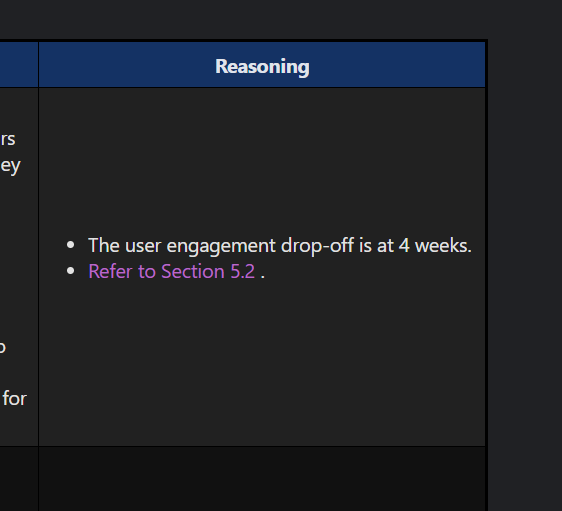